In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [20]:
train_df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
train_df.info()
print ('----------------------------------------------')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
--------------

In [5]:
train_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


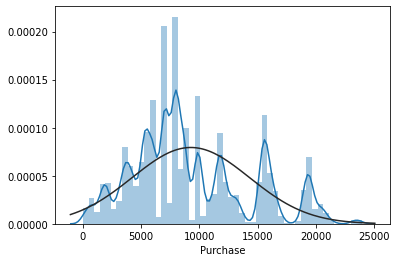

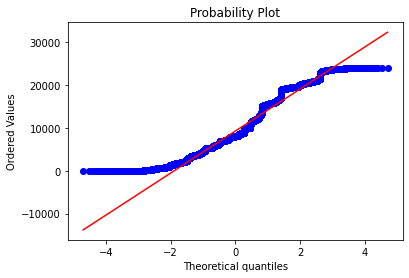

In [11]:
sns.distplot(train_df['Purchase'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['Purchase'], plot=plt)

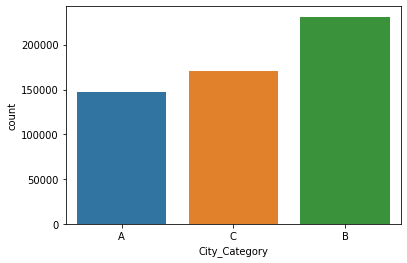

In [16]:
sns.countplot(x="City_Category", data=train_df)

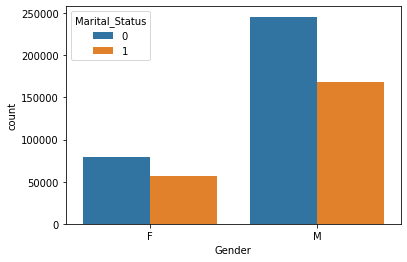

In [19]:
sns.countplot(x="Gender", hue="Marital_Status", data=train_df)

In [23]:
train_df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00077342       1
P00299742       1
P00012342       1
P00065542       1
Name: Product_ID, Length: 3631, dtype: int64

In [26]:
#sns.jointplot(x="Product_ID", y="Purchase", data=train_df)

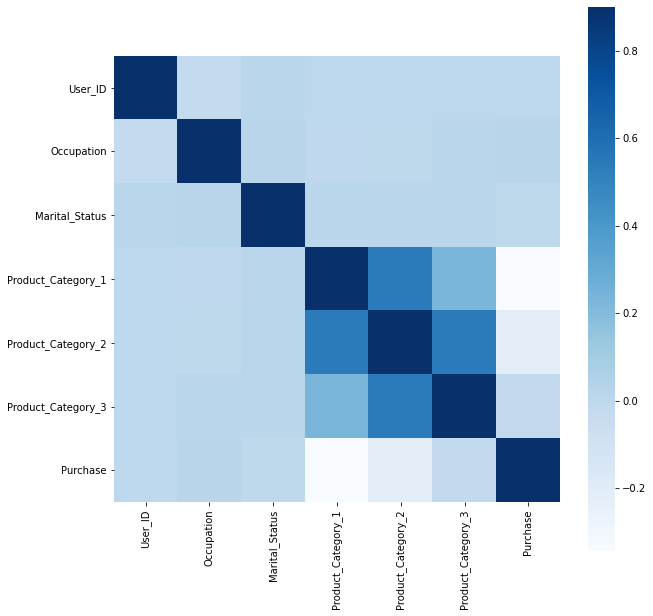

In [25]:
corr = train_df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

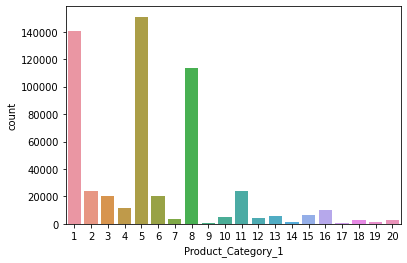

In [27]:
sns.countplot(x="Product_Category_1", data=train_df)

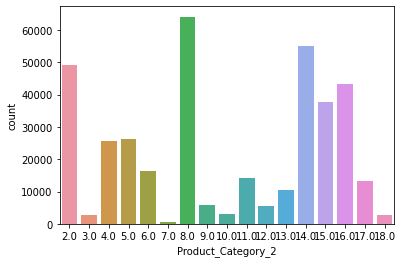

In [28]:
sns.countplot(x="Product_Category_2", data=train_df)

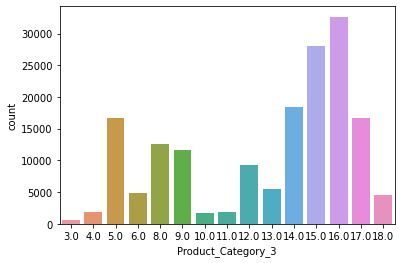

In [29]:
sns.countplot(x="Product_Category_3", data=train_df)

In [13]:
missing_val = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['Train', 'Test'])
missing_val[missing_val.sum(axis=1) > 0]

,Train,Test
Product_Category_2,173638,72344.0
Product_Category_3,383247,162562.0


In [35]:
train_df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [36]:
y = train_df["Purchase"]
train_df=train_df.iloc[:,0:11]

In [38]:
df=pd.concat([train_df,test_df],axis=0)

In [39]:
df.shape

(783667, 11)

In [40]:
df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1})

In [41]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,1,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,1,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,1,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,1,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,0,55+,16,C,4+,0,8,NaN,NaN


In [42]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [43]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [44]:
X=df.iloc[:,0:11]

In [45]:
df['Product_ID'].value_counts()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00062442       1
P00314742       1
P00144942       1
P00224642       1
P00064542       1
Name: Product_ID, Length: 3677, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
label_x = LabelEncoder()

In [48]:
X.iloc[:,0]=label_x.fit_transform(X.iloc[:,0])
X.iloc[:,1]=label_x.fit_transform(X.iloc[:,1])
X.iloc[:,3]=label_x.fit_transform(X.iloc[:,3])
X.iloc[:,5]=label_x.fit_transform(X.iloc[:,5])
X.iloc[:,6]=label_x.fit_transform(X.iloc[:,6])

In [52]:
X.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,684,1,0,10,0,2,0,3,8.0,16.0
1,0,2406,1,0,10,0,2,0,1,6.0,14.0
2,0,868,1,0,10,0,2,0,12,8.0,16.0
3,0,844,1,0,10,0,2,0,12,14.0,16.0
4,1,2769,0,6,16,2,4,0,8,8.0,16.0
5,2,1857,0,2,15,0,3,0,1,2.0,16.0
6,3,1771,0,4,7,1,2,1,1,8.0,17.0
7,3,3364,0,4,7,1,2,1,1,15.0,16.0
8,3,3649,0,4,7,1,2,1,1,16.0,16.0
9,4,2665,0,2,20,0,1,1,8,8.0,16.0


In [55]:
x=np.zeros((783667, 11))

In [57]:
x_train=x[0:550068,:]
x_test=x[550068:,:]

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_train,y,test_size=0.3,random_state=42)

In [61]:
from xgboost import XGBRegressor
model = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5)
model.fit(X_train, y_train)

[14:10:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [62]:
y_pred=model.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_pred,y_test))

In [67]:
rms

5020.193063194286

In [68]:
from xgboost import XGBRegressor
xgmodel = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5)
xgmodel.fit(x_train,y)

[14:50:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [69]:
yt_pred=xgmodel.predict(x_test)

In [70]:
submission = pd.DataFrame({ "Purchase": yt_pred,
                            "User_ID": test_df["User_ID"],
                            "Product_ID": test_df["Product_ID"]})
submission.to_csv('submission.csv', index=False)